In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df= pd.read_csv('List of Unicorn Startup Companies.csv')
df

,Unnamed: 0,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
0,0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
1,1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk
2,2,Shein,100,June 2022[13],E-commerce,China,Chris Xu
3,3,Stripe,50,March 2023[13],Financial services,US / Ireland,Patrick and John Collison
4,4,Canva,40,September 2021[16],Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"
...,...,...,...,...,...,...,...
653,653,Voi,1+,April 2022[59],NaN,Sweden,NaN
654,654,Neo Financial,1,May 2022[567],Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
655,655,Physics Wallah,1.1,June 2022[568],Educational technology,India,Alakh Pandey
656,656,OneCard,1.4+,July 2022[569],Financial technology,India,"Anurag Sinha, Rupesh Kumar, Vaibhav Hathi"


**Check for missing values:**


In [11]:
print("Missing Values Count Before Imputation:")
print(df.isnull().sum())

Missing Values Count Before Imputation:
Company                    0
Valuation(US$ billions)    0
Valuation date             0
Industry                   0
Country/countries          0
Founder(s)                 0
dtype: int64


**Perform data imputation:**

In [12]:
# For numeric columns, fill missing values with mean
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# For categorical columns, fill missing values with mode
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna(
    df[categorical_columns].mode().iloc[0])


**Check for missing values after imputation:**

In [18]:
print("\nMissing Values Count After Imputation:")
print(df.isnull().sum())


Missing Values Count After Imputation:
Company                    0
Valuation(US$ billions)    0
Valuation date             0
Industry                   0
Country/countries          0
Founder(s)                 0
dtype: int64


**Outliers Detection:**

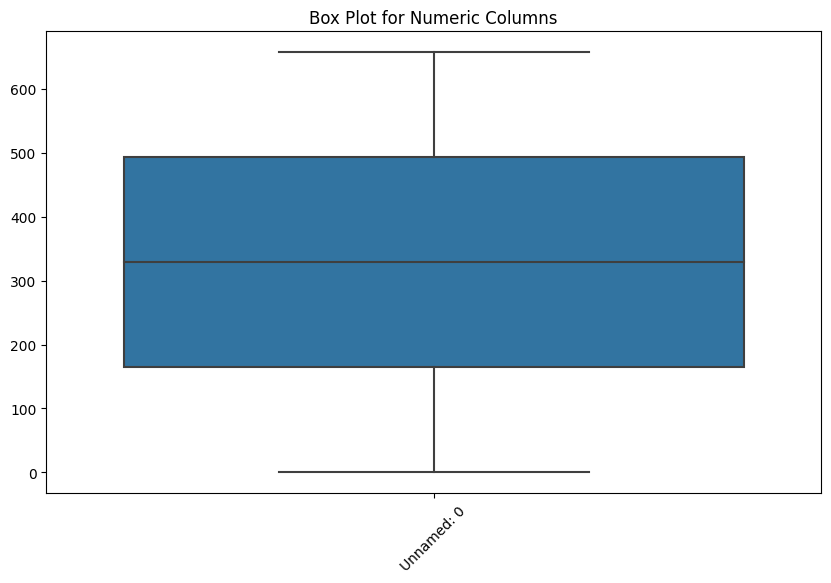

In [84]:
#Visualize boxplots for numeric columns to detect outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Box Plot for Numeric Columns')
plt.xticks(rotation=45)
plt.show()

# Identify outliers using IQR (Interquartile Range) method

Q1 = df.select_dtypes(include='number').quantile(0.25)
Q3 = df.select_dtypes(include='number').quantile(0.75)
IQR = Q3 - Q1


# Remove Outliers Using IQR Method
df = df[~((df.select_dtypes(include='number')) < (Q1 - 1.5 * IQR)) |
        ((df.select_dtypes(include='number')) > (Q3 + 1.5 * IQR)).any(axis=1)]


**Identifying and Handling Data Bias:**

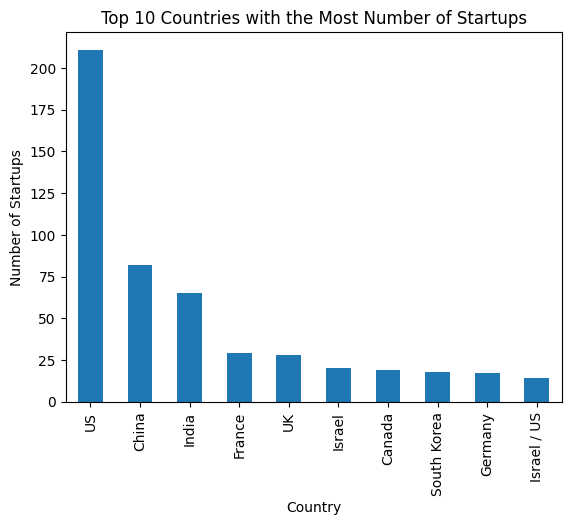

In [27]:
# Identify data bias by analyzing the distribution of categorical variables

country_counts = df['Country/countries'].value_counts()

# select the top 10 countries based on frequency
top_countries = country_counts[:10]

# create a bar chart of the top 10 countries
top_countries.plot(kind='bar')
plt.title('Top 10 Countries with the Most Number of Startups')
plt.xlabel('Country')
plt.ylabel('Number of Startups')
plt.show()


**Identifying & handling imbalanced data:**

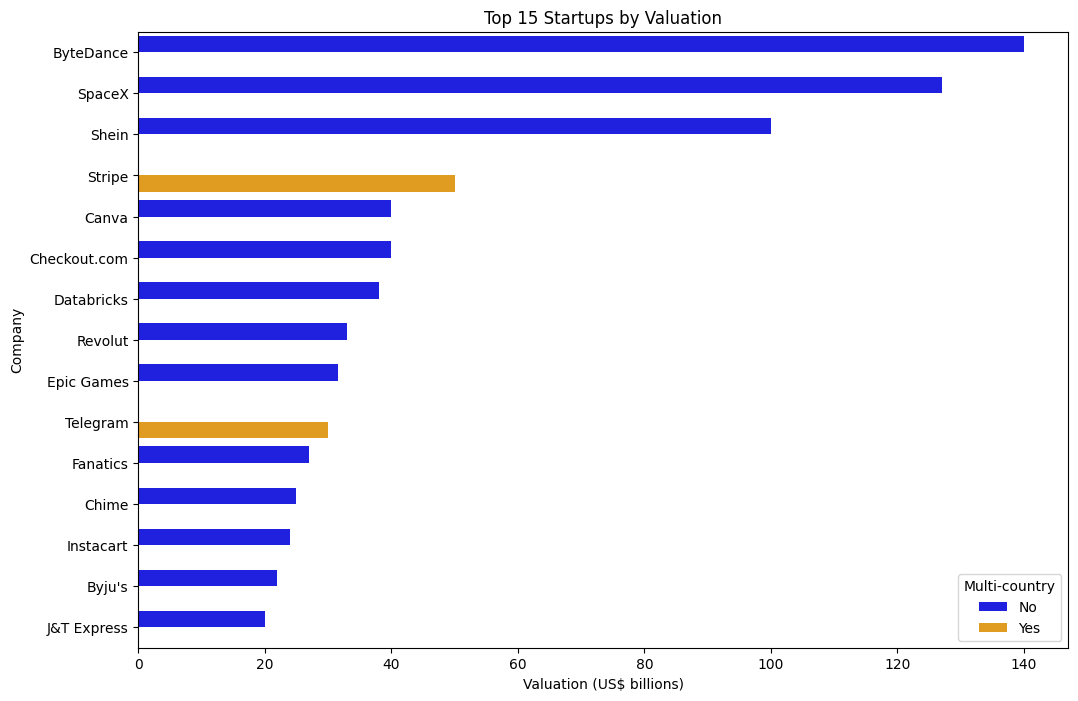

In [52]:
top_15 = df.sort_values(by='Valuation(US$ billions)', ascending=False).head(15)

plt.figure(figsize=(12, 8))

ax = sns.barplot(x='Valuation(US$ billions)', y='Company', data=top_15,
                 hue='Multi-country', palette={'No': 'blue', 'Yes': 'orange'})

ax.set_ylabel('Company')
ax.set_xlabel('Valuation (US$ billions)')
ax.set_title('Top 15 Startups by Valuation')

plt.show()